In [70]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
file_path = '../data/processed/'
df_macro = pd.read_csv(file_path + 'macro_data.csv')
df_stock = pd.read_csv(file_path + 'stock_data.csv')
df_factor = pd.read_csv(file_path + 'factor_data.csv')

dates = list(set(df_macro['date']) & set(df_factor['date']) & set(df_stock['date']))
cols = list(set(df_factor.columns) & set(df_stock.columns))

data_macro = df_macro.loc[df_macro['date'].isin(dates)].set_index('date').values
data_factor = df_factor.loc[df_factor['date'].isin(dates), cols].set_index('date').values
data_stock = df_stock.loc[df_stock['date'].isin(dates), cols].set_index('date').values
data_return = df_stock.loc[df_stock['date'].isin(dates), cols].set_index('date').pct_change(-5).fillna(0)

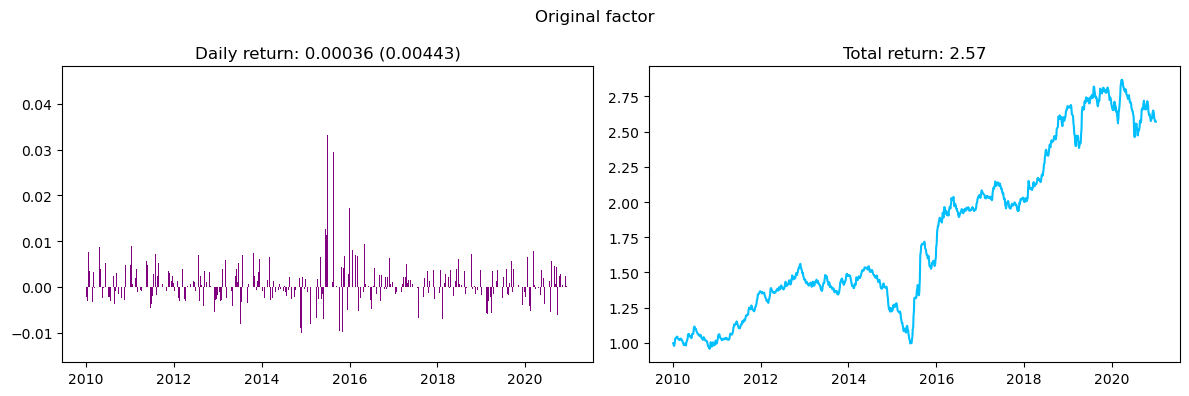

In [131]:
# daily return of Top-10%-Equally-Weighted portfolio based on the factor $ret(-20)$
cond = data_factor > np.quantile(data_factor, axis=1, q=0.9).reshape(-1, 1)
rets = np.where(cond, data_return.values, 0).mean(1)

x = np.array(dates, dtype='M8[D]')
x.sort()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(x, rets, color='purple')
ax1.set_title('Daily return: {} ({})'.format(rets.mean().round(5), rets.std().round(5)))


ax2.plot(x, np.cumprod(1+rets), color='deepskyblue')
ax2.set_title('Total return: {}'.format(np.cumprod(1+rets)[-1].round(2)))


plt.suptitle('Original factor')

plt.tight_layout()
plt.show()